# Will They Seek Treatment for a Mental Illness?

__By Lotus Baumgarner__

### Problem:

I want to build a predictive model to determine if someone would seek treatment for a mental illness or not. This project means a lot to me because I have close friends and family members who deal with mental illness. Some did seek treatment, while others are either not seeking it, or I feel would be a lot better off if they sought treatment sooner.

Mental Illness is a real issue in the United States but too many people do not want to talk about it or even admit it. Sometimes they feel it is a weakness or that nobody would understand. Sometimes they just do not know where to start. Some even feel like it is so over dramatized now a days, they do not want to be just part of the hype. 

So, I want to gear this project towards everyday friends and family members who feel someone close to them may be struggling with a mental illness. My motivation for this project is to hopefully deploy a model to help people recognize those who need treatment but will not seek it for themselves. 


### Data Set:
I decided to work with the Mental Health Dataset from Kaggle. 

https://www.kaggle.com/datasets/bhavikjikadara/mental-health-dataset

The features are all clear and defined and the overall data looks clean. The data is in a CSV format. It consists of just under 300,000 rows and 17 columns. The data types are all objects and are mostly strings or booleans. 
I do have some frequency counts and I am already planning to drop the Timestamps column, keep only the United States cases, and I am most likely going to simply drop the nulls from Self Employed. 


### Column Explanations:
1. __Timestamp__ - Time survey was submitted.
2. __Gender__ - Respondent's Gender.
3. __Country__ - Respondent's Country.
4. __Occupation__ - Respondent's Occupation.
5. __Self Employed__ - Whether the Respondent is self-employed.
6. __Family History__ - Whether there is a family history of mental health issues.
7. __Treatment__ - Whether the Respondent sought treatment for mental health issues.
8. __Days Indoors__ - Number of days Respondent spends inside.
9. __Growing Stress__ - Whether the Respondent is experiencing growing stress.
10. __Changes Habits__ - Whether the Respondent has changed their eating or sleeping habits.
11. __Mental Health History__ - Whether the Respondent has a history of mental health issues.
12. __Mood Swings__ - The frequency of mood swings experienced by the Respondent.
13. __Coping Struggles__ - Whether the Respondent struggles to cope with daily problems/stress.
14. __Work Interest__ - Whether the Respondent has lost interest in work.
15. __Social Interest__ - Whether the Respondent feels socially weak.
16. __Mental Health Interview__ - Willingness to discuss mental health in an interview.
17. __Care Options__ - Respondent's awareness of mental health care options available?

# 1. Data Exploration & Cleaning:

In [1]:
# Basic Data Manipulation
import pandas as pd
import numpy as np

# Visualization and Statistics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as stats

# Preprocessing and Models
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from xgboost import XGBClassifier

# Other Imports
import os  
import pickle

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
  

In [2]:
df = pd.read_csv("C:\\Users\\lotus\\Documents\\Flatiron\\Projects\\Phase5-CapstoneProject\\Data\\Mental Health Dataset.csv")

df.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
df.describe()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
count,292364,292364,292364,292364,287162,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364,292364
unique,580,2,35,5,2,2,2,5,3,3,3,3,2,3,3,3,3
top,8/27/2014 11:43,Male,United States,Housewife,No,No,Yes,1-14 days,Maybe,Yes,No,Medium,No,No,Maybe,No,No
freq,2384,239850,171308,66351,257994,176832,147606,63548,99985,109523,104018,101064,154328,105843,103393,232166,118886


In [5]:
print(df['Timestamp'].value_counts())
print("\n", df['Gender'].value_counts())
print("\n", df['Country'].value_counts())
print("\n", df['Occupation'].value_counts())
print("\n", df['self_employed'].value_counts())
print("\n", df['family_history'].value_counts())
print("\n", df['treatment'].value_counts())
print("\n", df['Days_Indoors'].value_counts())
print("\n", df['Growing_Stress'].value_counts())
print("\n", df['Changes_Habits'].value_counts())
print("\n", df['Mental_Health_History'].value_counts())
print("\n", df['Mood_Swings'].value_counts())
print("\n", df['Coping_Struggles'].value_counts())
print("\n", df['Work_Interest'].value_counts())
print("\n", df['Social_Weakness'].value_counts())
print("\n", df['mental_health_interview'].value_counts())
print("\n", df['care_options'].value_counts())

8/27/2014 11:43    2384
8/27/2014 12:31    2340
8/27/2014 12:53    1648
8/27/2014 12:39    1604
8/27/2014 16:21    1604
                   ... 
8/27/2014 23:59     390
8/29/2014 2:10      390
8/27/2014 16:07     390
8/28/2014 10:24     390
9/1/2014 9:15       390
Name: Timestamp, Length: 580, dtype: int64

 Male      239850
Female     52514
Name: Gender, dtype: int64

 United States             171308
United Kingdom             51404
Canada                     18726
Australia                   6026
Netherlands                 5894
Ireland                     5548
Germany                     4680
Sweden                      2818
India                       2774
France                      2340
Brazil                      2340
New Zealand                 1994
South Africa                1994
Italy                       1560
Switzerland                 1560
Israel                      1560
Belgium                      824
Poland                       824
Singapore                    780
D

In [6]:
# Kept only rows associated with the United States.  Makes up a majority of the data set and want to keep focus on US anyway.
treatment_df = df[df['Country'] == 'United States']

In [7]:
# Dropped Timestamp since it doesn't hold any value to my model.
treatment_df = treatment_df.drop('Timestamp', axis=1)

In [8]:
# Dropped the null values from Self Employed. Only 5,202 values are null, so dropping won't lessen data set value.
treatment_df.dropna(subset=['self_employed'], inplace=True)


In [9]:
# Converted columns to 'category' dtype. 
# This makes it easier, since many ML techniques require categorical data to be explicitly declared as such.
categorical_columns = ['Gender', 'Country', 'Occupation', 'self_employed', 'family_history', 'treatment',
                       'Days_Indoors', 'Growing_Stress', 'Changes_Habits', 'Mental_Health_History',
                       'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
                       'mental_health_interview', 'care_options']

for col in categorical_columns:
    treatment_df[col] = treatment_df[col].astype('category')


In [10]:
# Changed the column name to proper capitalization for easier reading.
column_names = {
    'Timestamp': 'Timestamp',
    'Gender': 'Gender',
    'Country': 'Country',
    'Occupation': 'Occupation',
    'self_employed': 'Self_Employed',
    'family_history': 'Family_History',
    'treatment': 'Treatment',
    'Days_Indoors': 'Days_Indoors',
    'Growing_Stress': 'Growing_Stress',
    'Changes_Habits': 'Changes_Habits',
    'Mental_Health_History': 'Mental_Health_History',
    'Mood_Swings': 'Mood_Swings',
    'Coping_Struggles': 'Coping_Struggles',
    'Work_Interest': 'Work_Interest',
    'Social_Weakness': 'Social_Weakness',
    'mental_health_interview': 'Mental_Health_Interview',
    'care_options': 'Care_Options'
}

treatment_df.rename(columns=column_names, inplace=True)

treatment_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168056 entries, 3 to 292363
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   Gender                   168056 non-null  category
 1   Country                  168056 non-null  category
 2   Occupation               168056 non-null  category
 3   Self_Employed            168056 non-null  category
 4   Family_History           168056 non-null  category
 5   Treatment                168056 non-null  category
 6   Days_Indoors             168056 non-null  category
 7   Growing_Stress           168056 non-null  category
 8   Changes_Habits           168056 non-null  category
 9   Mental_Health_History    168056 non-null  category
 10  Mood_Swings              168056 non-null  category
 11  Coping_Struggles         168056 non-null  category
 12  Work_Interest            168056 non-null  category
 13  Social_Weakness          168056 non-null  ca

## Visualizations:
Just a few analysis visuals for the distribution of the Treatment and Gender columns balance, and the relationship between Treatment and Family History/Care Options.

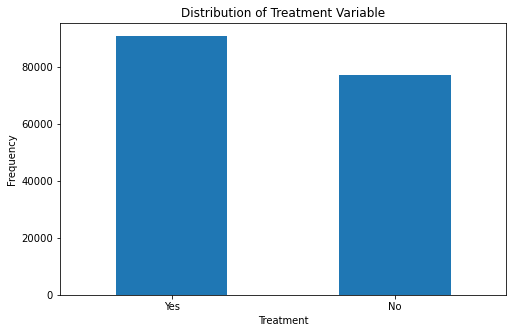

Yes    90950
No     77106
Name: Treatment, dtype: int64

In [11]:
# Analyzed the distribution count for the Treatment column to check for imbalance.
treatment_counts = treatment_df['Treatment'].value_counts()

plt.figure(figsize=(8, 5))
treatment_counts.plot(kind='bar')

plt.title('Distribution of Treatment Variable')
plt.xlabel('Treatment')
plt.ylabel('Frequency')
plt.xticks(rotation=0)

plt.show()

treatment_counts

##### FINDINGS:
The distribution of Yes and No values are fairly balanced. So, I'm not going to oversample or undersample for now. 

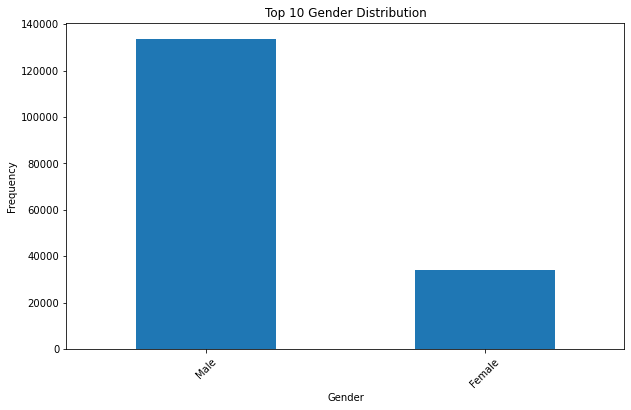

Male      133770
Female     34286
Name: Gender, dtype: int64

In [12]:
# Analyzed the distribution of the 'Gender' column
gender_counts = treatment_df['Gender'].value_counts()

plt.figure(figsize=(10, 6))
gender_counts.plot(kind='bar')

plt.title('Top 10 Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

plt.show()

gender_counts

##### FINDINGS:
The number of Males surveyed severely outweighs the number of females. 

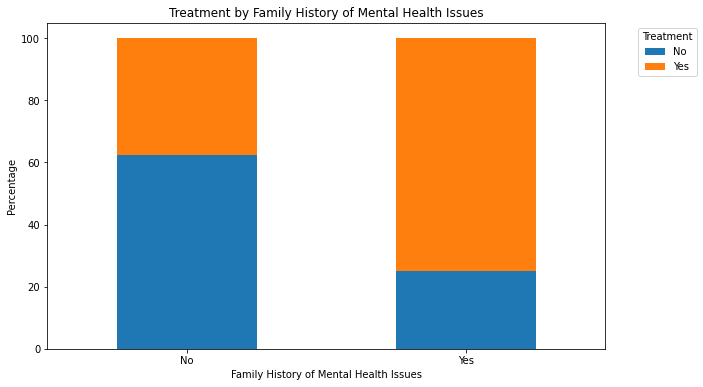

Treatment,No,Yes
Family_History,,
No,62.278179,37.721821
Yes,25.127403,74.872597


In [13]:
# Analyzed the relationship between Treatment and Family History
treatment_family_history = pd.crosstab(index=treatment_df['Family_History'], columns=treatment_df['Treatment'], normalize='index') * 100

treatment_family_history.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Treatment by Family History of Mental Health Issues')
plt.xlabel('Family History of Mental Health Issues')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

treatment_family_history

##### FINDINGS:
Those with a family history of mental illness are more likely to seek treatment independently than those without a family history.

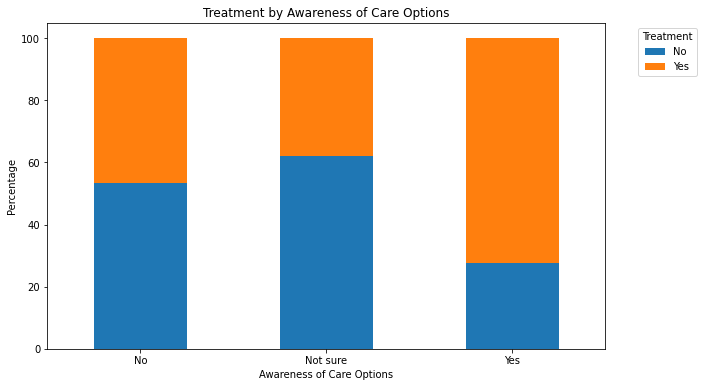

Treatment,No,Yes
Care_Options,,
No,53.403441,46.596559
Not sure,62.184119,37.815881
Yes,27.781177,72.218823


In [14]:
# Analyzed the relationship between Treatment and Care Options
treatment_care_options = pd.crosstab(index=treatment_df['Care_Options'], columns=treatment_df['Treatment'], normalize='index') * 100

treatment_care_options.plot(kind='bar', figsize=(10, 6), stacked=True)

plt.title('Treatment by Awareness of Care Options')
plt.xlabel('Awareness of Care Options')
plt.ylabel('Percentage')
plt.xticks(rotation=0)
plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

treatment_care_options

##### FINDINGS:
Those who knew about available care options are more likely to seek treatment independently.
Those who were either not sure or did not know of available care options are more likely not to seek treatment on their own.

## Chi-Squared Tests:
Since my Data Frame is entirely categorical values, I decided to create a for loop to preform a Chi-Squared test on each column versus Treatment to determine which features correlate the most with my target variable.

I Formulated a single Hypotheses for each pair of variables.

H0 (Null Hypothesis): There is no association between the two categorical variables (example: between Treatment and Country).

H1 (Alternative Hypothesis): There is an association between the two categorical variables.

In [15]:
# Listed all of the columns to compare with Treatment
columns_to_test = [col for col in treatment_df.columns if col != 'Treatment']

# Created a placeholder for the results
results = []

# Created the for loop to preform each test individually
for col in columns_to_test:
    # Created a contingency table for each column against Treatment
    contingency_table = pd.crosstab(treatment_df[col], treatment_df['Treatment'])
    
    # Performed the Chi-Squared Test for each column
    chi2, p, df, expected = stats.chi2_contingency(contingency_table)
    
    # Determined the results
    alpha = 0.05
    decision = "Reject the null hypothesis - There is a significant association between the variables." if p < alpha else "Fail to reject the null hypothesis - There is no significant association between the variables."
    
    # Appended the results including the decision to the dictionary
    results.append({
        'Variable': col,
        'Chi-Squared Statistic': chi2,
        'P-value': p,
        'Degrees of Freedom': df,
        'Decision': decision
    })

# Converted the results into a DataFrame for easier viewing
results_df = pd.DataFrame(results)

# Sorted the DataFrame by p-value to prioritize viewing
results_df = results_df.sort_values(by='P-value')

# Displayed the results with the decision. Printed each on a new line for easier viewing.
for index, row in results_df.iterrows():
    print(f"Variable: {row['Variable']}")
    print(f"Chi-Squared Statistic: {row['Chi-Squared Statistic']}")
    print(f"P-value: {row['P-value']:.5f}") 
    print(f"Degrees of Freedom: {row['Degrees of Freedom']}")
    print(f"Decision: {row['Decision']}\n") 

Variable: Gender
Chi-Squared Statistic: 4167.626018748589
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject the null hypothesis - There is a significant association between the variables.

Variable: Family_History
Chi-Squared Statistic: 23030.572894605433
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject the null hypothesis - There is a significant association between the variables.

Variable: Mental_Health_Interview
Chi-Squared Statistic: 1850.491849751891
P-value: 0.00000
Degrees of Freedom: 2
Decision: Reject the null hypothesis - There is a significant association between the variables.

Variable: Care_Options
Chi-Squared Statistic: 14905.526822399403
P-value: 0.00000
Degrees of Freedom: 2
Decision: Reject the null hypothesis - There is a significant association between the variables.

Variable: Self_Employed
Chi-Squared Statistic: 85.20892992967912
P-value: 0.00000
Degrees of Freedom: 1
Decision: Reject the null hypothesis - There is a significant association between t

##### FINDINGS:
The Chi-Squared tests show a significant association between __Treatment__ and the __Gender__, __Family History__, __Mental Health Interview__, __Care Options__, __Self Employed__, __Coping Struggles__, __Growing Stress__, __Occupation__, and the __Mental Health History__ columns. I will be using these columns for my model.

The Chi-Squared tests show no significant association between __Treatment__ and the __Mood Swings__, __Work Interest__, __Days Indoors__, __Social Weakness__, __Changes Habits__, and the __Country__ columns.

For what I want to accomplish with this model, these results were somewhat expected.  I did, however, expect __Days Indoors__, __Work Interest__, and __Social Weakness__ to play more of a part in the results but it seems they do not. 

# 2. Train-Test Split & Basic Pipeline Set-up:
Since all my columns are categorical and not ordered, I'll be using __One Hot Encoder__ to convert my data into numerical format. 

I used __Train-Test Split__ with __Cross-Validation__ with a 80/20 split for my training and testing sets. I also mapped my target variable (y) to be Yes = 0 and No = 1.

__I am labeling my TP, TN, FP, and FN as follows:__

__True Positive__ = The model correctly identifies individuals who will not seek treatment on their own. These are the cases where the actual class is "No" (do need help) and the model predicts "No."

__True Negative__ = The model correctly identifies individuals who will seek treatment on their own. These are the cases where the actual class is "Yes" (do not need help) and the model predicts "Yes."

__False Positives__ = The model incorrectly identifies individuals as not seeking treatment on their own when they will. 

__False Negative__ = The model incorrectly identifies individuals as seeking treatment on their own when they will not. 

Since the cost of my false negative is higher than the cost of my false positive, I will be focusing on __Recall__ as my metric for evaluation. A False Negative is a situation where someone needs help but is not flagged by the model. Minimizing this outcome is vital to ensure that individuals who are unlikely to seek help are identified and can be supported by their friends and family.


In [16]:
# Started by selecting only the columns associated with my target variable.
selected_columns = ['Gender', 'Family_History', 'Mental_Health_Interview', 'Care_Options',
                       'Self_Employed', 'Coping_Struggles', 'Growing_Stress', 'Occupation',
                       'Mental_Health_History']

treatment_df[selected_columns]

,Gender,Family_History,Mental_Health_Interview,Care_Options,Self_Employed,Coping_Struggles,Growing_Stress,Occupation,Mental_Health_History
3,Female,Yes,Maybe,Yes,No,No,Yes,Corporate,Yes
4,Female,Yes,No,Yes,No,No,Yes,Corporate,Yes
7,Female,No,No,No,No,No,Yes,Corporate,Yes
8,Female,No,No,Not sure,No,No,Yes,Corporate,Yes
9,Female,No,No,No,No,No,Yes,Corporate,Yes
...,...,...,...,...,...,...,...,...,...
292358,Male,No,Maybe,Not sure,No,Yes,No,Business,No
292359,Male,Yes,Maybe,Not sure,Yes,Yes,No,Business,No
292361,Male,Yes,No,No,No,Yes,No,Business,No
292362,Male,Yes,No,Yes,No,Yes,No,Business,No


In [17]:
# I split the data into features (X) and the target variable (y), which is Treatment.
X = treatment_df[selected_columns]
y = treatment_df['Treatment'].map({'Yes': 0, 'No': 1})  # Converted target variable to numeric

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# Created a Preprocessing pipeline for categorical features
categorical_features = selected_columns
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])


In [19]:
# Defined the basic pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', 'model')])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Family_History',
                                                   'Mental_Health_Interview',
                                                   'Care_Options',
                                                   'Self_Employed',
                                                   'Coping_Struggles',
                                                   'Growing_Stress',
                                                   'Occupation',
                                                   'Mental_Health_History'])])),
                ('model', 'model')])

## 3. Baseline Model - Logistic Regression:

In [20]:
# Defined the first (Baseline) model 
model1 = LogisticRegression(max_iter=1000, random_state=42)

# Added model1 into the Basic Pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model1)])

pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Gender', 'Family_History',
                                                   'Mental_Health_Interview',
                                                   'Care_Options',
                                                   'Self_Employed',
                                                   'Coping_Struggles',
                                                   'Growing_Stress',
                                                   'Occupation',
                                                   'Mental_Health_History'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [21]:
# Trained the model
pipeline.fit(X_train, y_train)

# Predictions & Evaluation
y_pred = pipeline.predict(X_test)
recall = recall_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

# Cross-validated
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='recall')

print(recall)
print(classification_report_str)
print(cv_scores)

0.6197164865039808
              precision    recall  f1-score   support

           0       0.71      0.78      0.74     18163
           1       0.71      0.62      0.66     15449

    accuracy                           0.71     33612
   macro avg       0.71      0.70      0.70     33612
weighted avg       0.71      0.71      0.70     33612

[0.2116457  0.6373776  0.64023085 0.64243564 0.6373776 ]


##### FINDINGS:  Test Set  
Keeping in mind that No = 1 and Yes = 0, The recall score of 0.619 percent means the model is only predicting 62% of individuals who are unlikely to seek treatment on their own. 

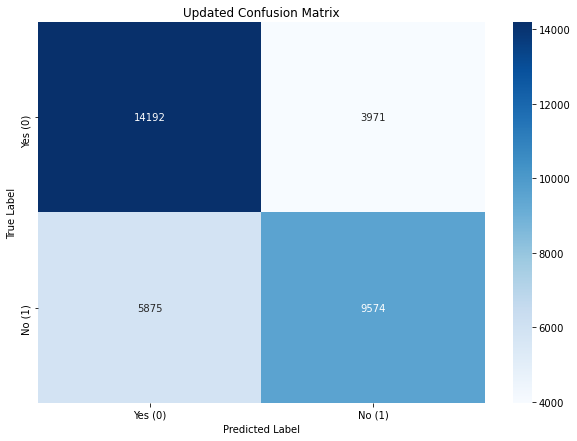

In [22]:
# Created the confusion matrix for visualization
cm = confusion_matrix(y_test, y_pred, labels=pipeline.named_steps['model'].classes_)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Yes (0)", "No (1)"], yticklabels=["Yes (0)", "No (1)"])
plt.title('Updated Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

##### FINDINGS:
__TP:9574__ - The model correctly identifies 9574 individuals who will not seek treatment on their own ("No" class, do need help).

__TN:14192__ - The model correctly identifies 14192 individuals who will seek treatment on their own ("Yes" class, do not need help).

__FP:3971__ - The model incorrectly identifies 3971 individuals as not seeking treatment on their own when they will.

__FN:5875__ - The model incorrectly identifies 5875 individuals as seeking treatment on their own when they will not.

In [23]:
# Pulled the feature names created by OHE and the total of new columns.
ohe_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out()

total_new_columns = len(ohe_feature_names)

print(ohe_feature_names)
print(f"Total new columns: {total_new_columns}")

['Gender_Female' 'Gender_Male' 'Family_History_No' 'Family_History_Yes'
 'Mental_Health_Interview_Maybe' 'Mental_Health_Interview_No'
 'Mental_Health_Interview_Yes' 'Care_Options_No' 'Care_Options_Not sure'
 'Care_Options_Yes' 'Self_Employed_No' 'Self_Employed_Yes'
 'Coping_Struggles_No' 'Coping_Struggles_Yes' 'Growing_Stress_Maybe'
 'Growing_Stress_No' 'Growing_Stress_Yes' 'Occupation_Business'
 'Occupation_Corporate' 'Occupation_Housewife' 'Occupation_Others'
 'Occupation_Student' 'Mental_Health_History_Maybe'
 'Mental_Health_History_No' 'Mental_Health_History_Yes']
Total new columns: 25


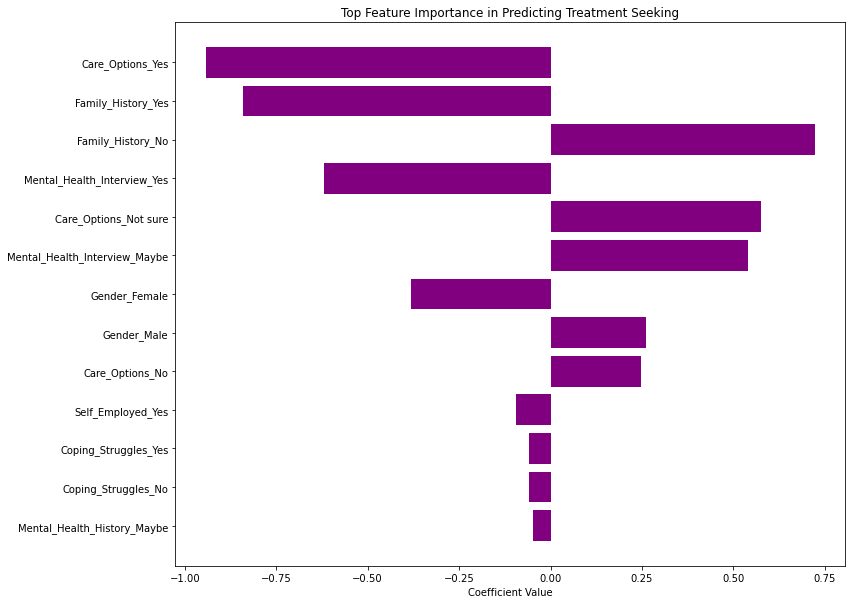

In [25]:
# I wanted to pull the top half of the features that had the most impact on the target variable.

# Extracted the coefficients from the logistic regression model
model_coef = pipeline.named_steps['model'].coef_[0]

# Mapped the coefficients to feature names
feature_importance = dict(zip(ohe_feature_names, model_coef))

# Sorted features by the absolute value of their coefficients, in descending order
sorted_features = sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

# Selected top 13 features for visualization
top_n = 13
top_features = sorted_features[:top_n]
feature_names, coefficients = zip(*top_features)

# Top 13 features Visual
plt.figure(figsize=(12, 10))
plt.barh(range(len(feature_names)), coefficients, color='purple')
plt.yticks(range(len(feature_names)), feature_names)

plt.xlabel('Coefficient Value')
plt.title('Top Feature Importance in Predicting Treatment Seeking')
# Inverted the y-axis so the features with the highest coefficients are on top
plt.gca().invert_yaxis()

plt.show()

##### FINDINGS:
The bars extending to the right (__Family History No__, __Care Options Not Sure__, ect.) indicate the features that increase the likelihood of an individual not seeking treatment when its value is present or high. 

The bars extending to the left (__Care Options Yes__, __Family History Yes__, ect.) indicate the features that decrease this likelihood. And therefore the individual is more likely to seek treatment on their own.
